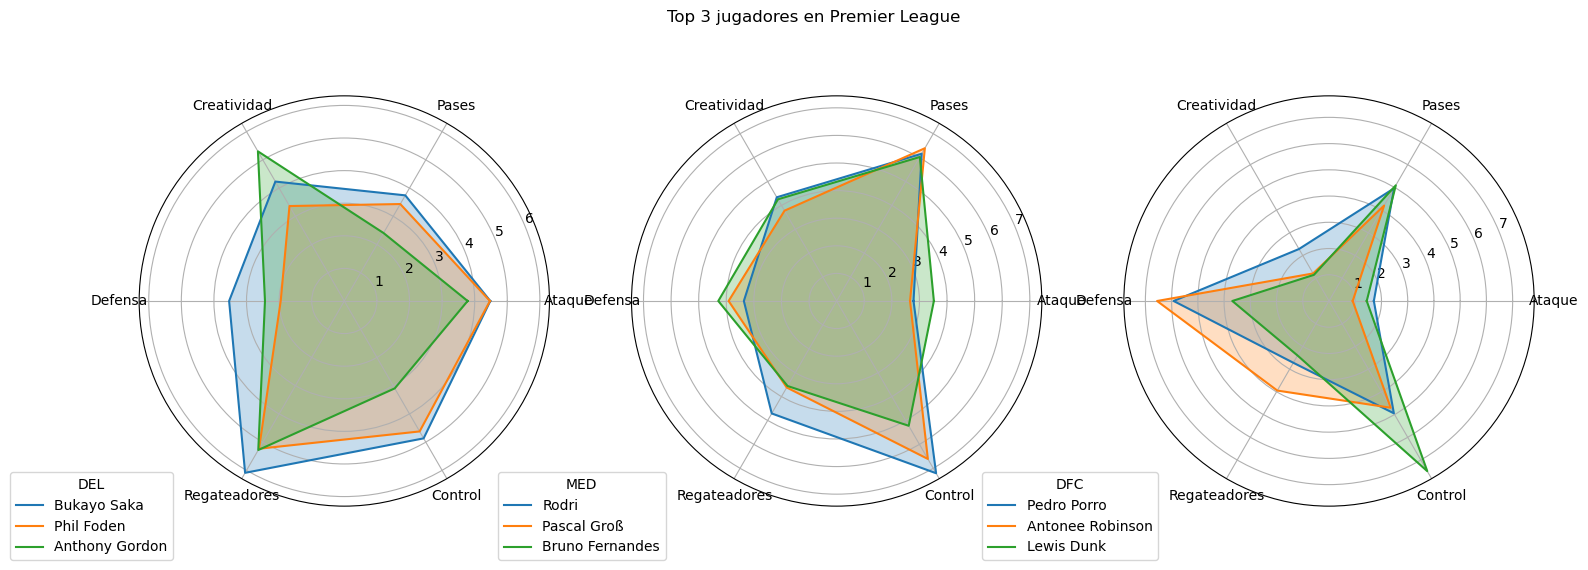

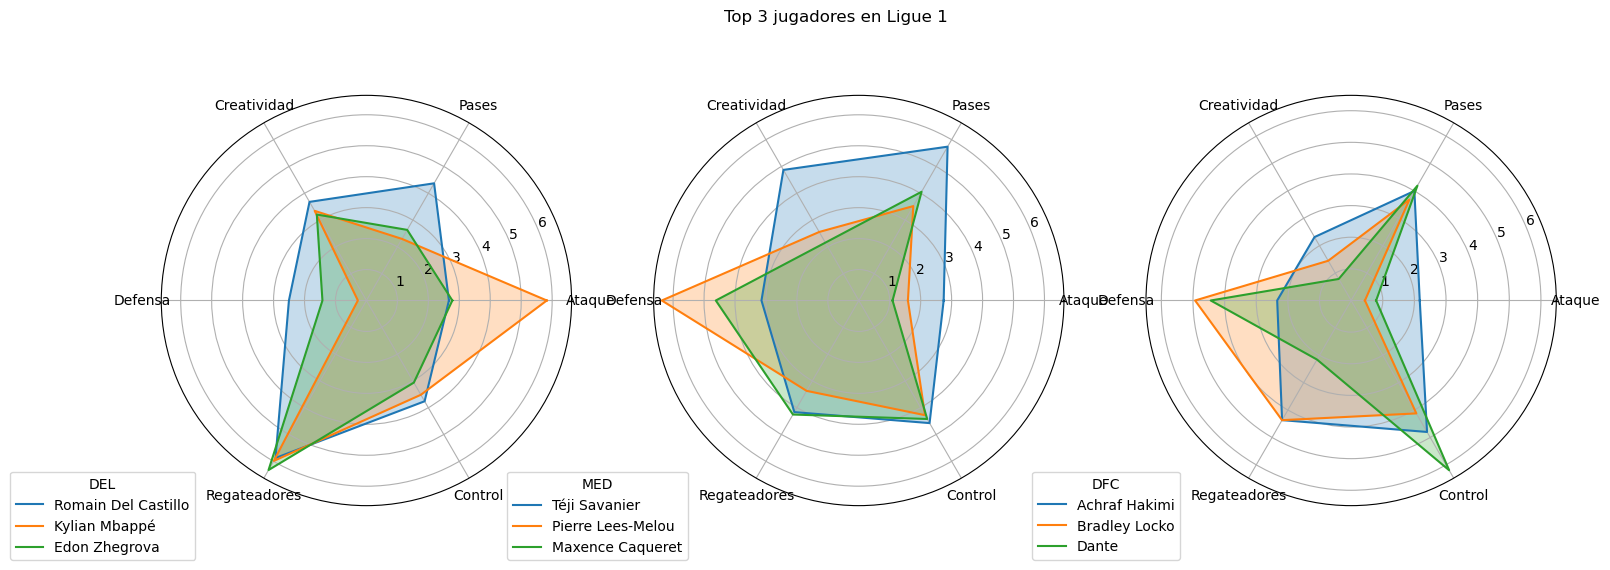

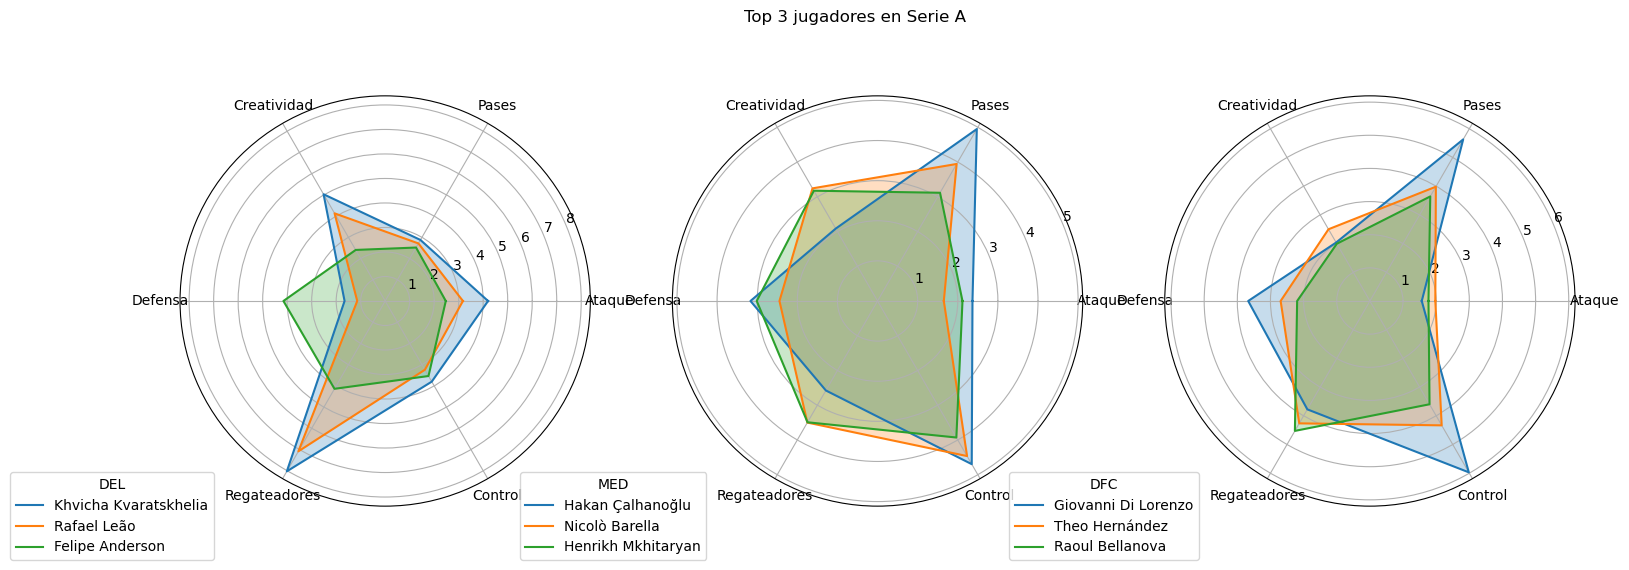

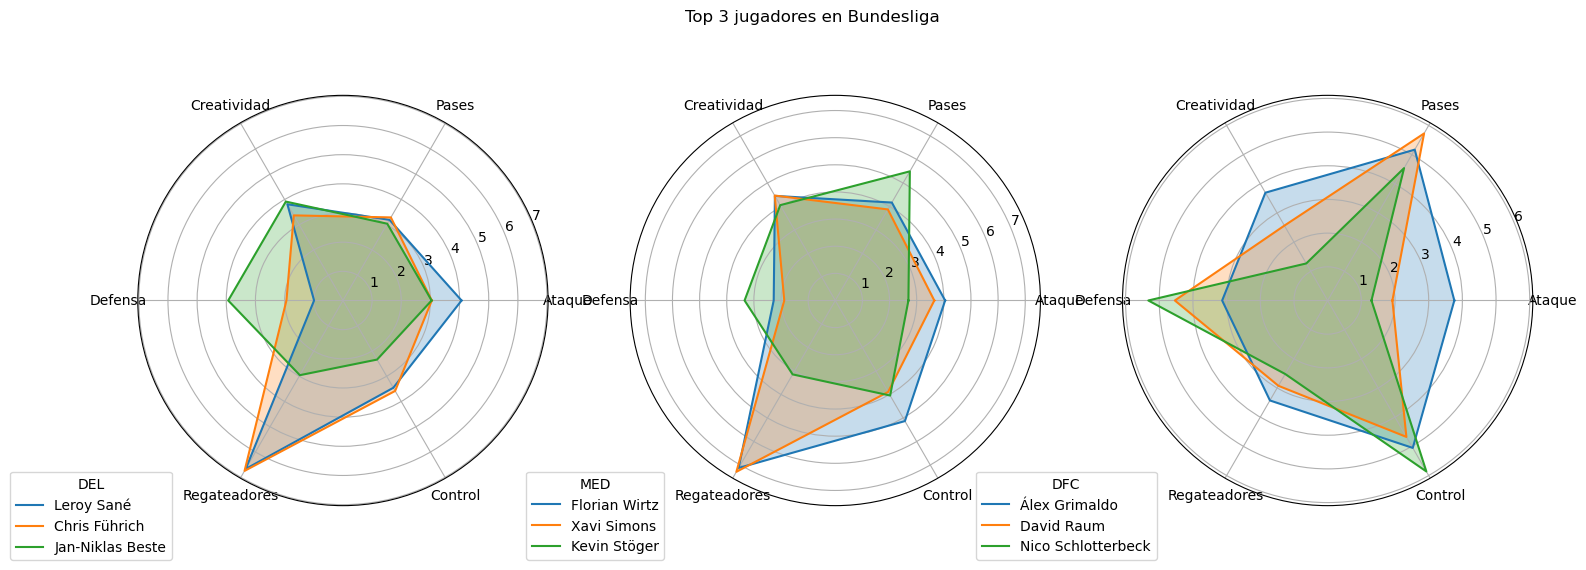

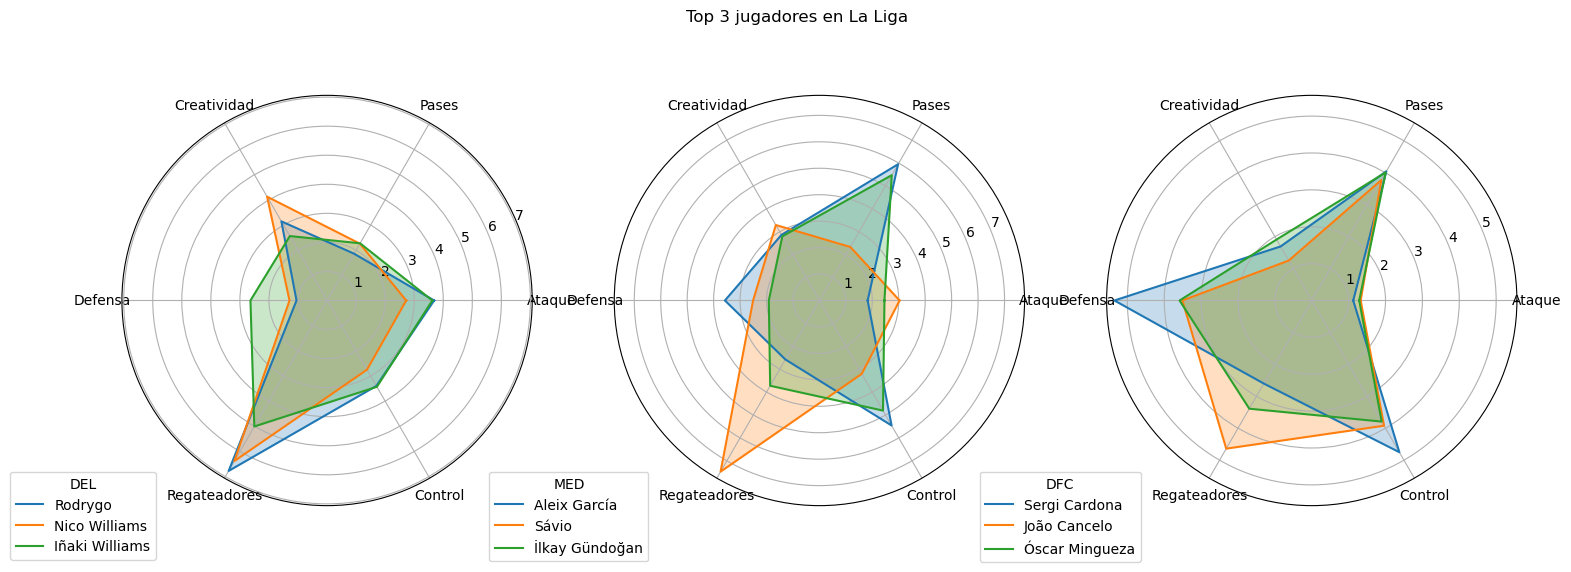

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel('Base de datos kmeans TFG.xlsx', sheet_name='Base de datos final')


positions = ['DEL', 'MED', 'DFC']
ligas = data['Liga'].unique()


features = ['Ataque', 'Pases', 'Creatividad', 'Defensa', 'Regateadores', 'Control']
num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

def add_to_plot(ax, values, label):
    values = np.append(values, values[:1])
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, label=label)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)


for liga in ligas:
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))
    fig.suptitle(f'Top 3 jugadores en {liga}')

    for i, position in enumerate(positions):
        position_data = data[(data['Pos'] == position) & (data['Liga'] == liga)]
        # Suponiendo que una columna 'Total' representa la puntuación total del jugador
        top_players = position_data.nlargest(3, 'TOTAL')
        
        for index, row in top_players.iterrows():
            add_to_plot(axs[i], row[features].values, row['Jugador'])

        axs[i].legend(title=position, loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.show()


C:\Users\paulo.q.gonzalez\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\paulo.q.gonzalez\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\paulo.q.gonzalez\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\paulo.q.gonzalez\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

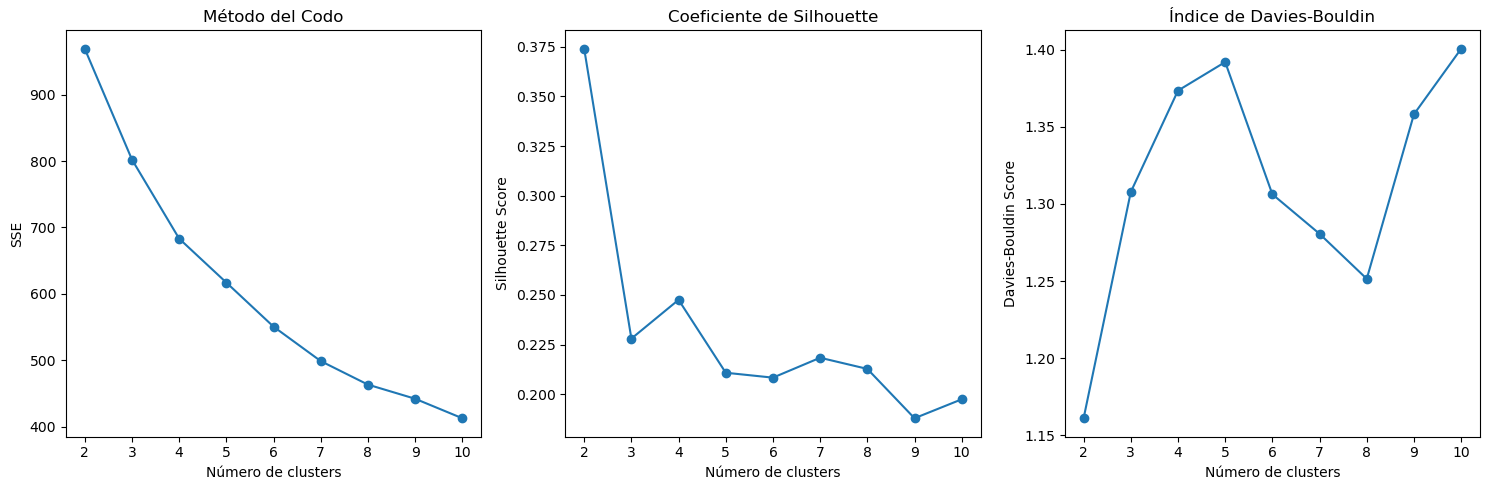

C:\Users\paulo.q.gonzalez\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\paulo.q.gonzalez\AppData\Local\Temp\ipykernel_24668\631605600.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.fit_predict(scaled_features)


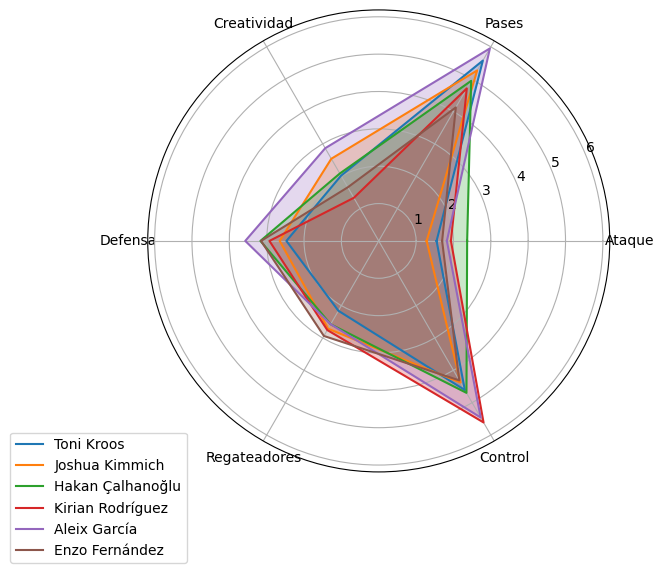

Inercia (SSE): 802.2031676411324
Coeficiente de Silhouette: 0.22796913002018934
Índice de Davies-Bouldin: 1.307710690354206

Estadísticas Descriptivas:
                Min         Edad       Ataque        Pases  Creatividad  \
count  2257.000000  2257.000000  2257.000000  2257.000000  2257.000000   
mean   1167.095702    25.027027     0.956983     1.214136     0.756497   
std     855.358163     4.484674     0.992386     1.109279     0.820965   
min       1.000000    15.000000     0.000000     0.000000     0.000000   
25%     357.000000    22.000000     0.099027     0.273611     0.127910   
50%    1130.000000    25.000000     0.785017     0.961532     0.495518   
75%    1874.000000    28.000000     1.532674     1.851959     1.097310   
max    3239.000000    39.000000     7.944231     6.391703     5.301022   

           Defensa  Regateadores      Control        TOTAL  
count  2257.000000   2257.000000  2257.000000  2257.000000  
mean      1.552892      1.219852     1.578054     1.213069

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import os
import unidecode  

def normalize_name(name):
    """Normaliza los nombres de los jugadores removiendo acentos y convirtiendo a minúsculas."""
    return unidecode.unidecode(name).lower()

os.environ["OMP_NUM_THREADS"] = "1"

data = pd.read_excel('Base de datos kmeans TFG.xlsx', sheet_name='Base de datos final')

#PONGA EL NOMBRE DEL JUGADOR QUE QUIERE EVALUAR
input_player_name = 'Toni Kroos'
normalized_input_name = normalize_name(input_player_name)
data['Normalized_Jugador'] = data['Jugador'].apply(normalize_name)

#PONGA AQUI LA POSICION DE DICHO JUGADOR
position = 'MED'
filtered_data = data[(data['Pos'] == position) & (data['Min'] > 1600)]


if normalized_input_name in filtered_data['Normalized_Jugador'].values:
    target_player = filtered_data[filtered_data['Normalized_Jugador'] == normalized_input_name]['Jugador'].iloc[0]
    target_stats = filtered_data[filtered_data['Jugador'] == target_player][['Ataque', 'Pases', 'Creatividad', 'Defensa', 'Regateadores', 'Control']].values[0]
else:
    print(f"No se pudo encontrar '{input_player_name}' en los datos.")
    exit()

features = ['Ataque', 'Pases', 'Creatividad', 'Defensa', 'Regateadores', 'Control']


scaler = StandardScaler()
scaled_features = scaler.fit_transform(filtered_data[features])
scaled_target_stats = scaler.transform([target_stats])  

sse = []
silhouette_avg = []
davies_bouldin_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    
    sse.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(scaled_features, labels))
    davies_bouldin_scores.append(davies_bouldin_score(scaled_features, labels))


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')

plt.subplot(1, 3, 2)
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Coeficiente de Silhouette')

plt.subplot(1, 3, 3)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Índice de Davies-Bouldin')

plt.tight_layout()
plt.show()


num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
filtered_data['Cluster'] = kmeans.fit_predict(scaled_features)


target_cluster_label = kmeans.predict(scaled_target_stats)[0]


cluster_data = filtered_data[filtered_data['Cluster'] == target_cluster_label]


distances = cluster_data.apply(lambda row: euclidean(row[features], target_stats), axis=1)


if target_player in cluster_data['Jugador'].values:
    distances = distances.drop(cluster_data[cluster_data['Jugador'] == target_player].index)


closest_players = distances.nsmallest(5).index
closest_players_list = cluster_data.loc[closest_players, 'Jugador']


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
labels = np.array(features)
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

def add_to_plot(ax, values, label):
    values = np.append(values, values[:1])
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, label=label)

add_to_plot(ax, target_stats, target_player)
for index in closest_players:
    player_stats = cluster_data.loc[index, features].values
    player_name = cluster_data.loc[index, 'Jugador']
    add_to_plot(ax, player_stats, player_name)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


inertia = kmeans.inertia_
silhouette_avg = silhouette_score(scaled_features, filtered_data['Cluster'])
davies_bouldin = davies_bouldin_score(scaled_features, filtered_data['Cluster'])

print(f'Inercia (SSE): {inertia}')
print(f'Coeficiente de Silhouette: {silhouette_avg}')
print(f'Índice de Davies-Bouldin: {davies_bouldin}')

summary_stats = data.describe()
print("\nEstadísticas Descriptivas:\n", summary_stats)
